In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course\notebooks
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course


In [3]:
###################################
# Preprocessing nonlinear loading #
###################################
import math
def preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ):
    strainPathXprocess = strainPathX.copy()
    strainPathYprocess = strainPathY.copy()
    strainPathZprocess = strainPathZ.copy()
    turningIndices = turningStressPoints(trueStress)
    #print(turningIndices)
    #unloadingIndex = turningIndices[0]
    reloadingIndex = turningIndices[1]
    #print(trueStress[reloadingIndex - 1])
    #print(trueStress[reloadingIndex])
    #print(trueStress[reloadingIndex + 1])
    for i in range(reloadingIndex, trueStrain.size):
        strainPathXprocess[i] -= strainPathX[reloadingIndex]
        strainPathYprocess[i] -= strainPathY[reloadingIndex]
        strainPathZprocess[i] -= strainPathZ[reloadingIndex]
    #strainReloading =  (2 ** (1/2))/3 * (strainPathXprocess ** 2 + strainPathYprocess ** 2 + strainPathZprocess ** 2) ** (1/2) + trueStrain[reloadingIndex]
    strainReloading =  (2/3) ** (1/2) * (strainPathXprocess ** 2 + strainPathYprocess ** 2 + strainPathZprocess ** 2) ** (1/2) + trueStrain[reloadingIndex]
    actualStrain = trueStrain.copy()
    for i in range(reloadingIndex, trueStrain.size):
        actualStrain[i] = strainReloading[i]
    return {"strain": actualStrain, "stress": trueStress}

def turningStressPoints(trueStress):
    differences = np.diff(trueStress)
    index = 1
    turningIndices = []
    while index < differences.size:
        if (differences[index - 1] <= 0 and differences[index] >= 0) or (differences[index - 1] >= 0 and differences[index] <= 0):
            turningIndices.append(index)
        index += 1
    return turningIndices

def preprocessDAMASKNonlinear(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))","1_ln(V)","5_ln(V)","9_ln(V)"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    strainPathX = df["1_ln(V)"].to_numpy().reshape(-1)
    strainPathY = df["5_ln(V)"].to_numpy().reshape(-1)
    strainPathZ = df["9_ln(V)"].to_numpy().reshape(-1)
    return preprocessNonlinear(trueStrain, trueStress, strainPathX, strainPathY, strainPathZ)

################################
# Preprocessing linear loading #
################################

def preprocessLinear(trueStrain, trueStress):
    # truePlasticStrain = trueStrain - trueElasticstrain = trueStrain - trueStress/Young's modulus
    Young = (trueStress[1] - trueStress[0]) / (trueStrain[1] - trueStrain[0])
    truePlasticStrain = trueStrain - trueStress / Young    
    return {"strain": truePlasticStrain, "stress": trueStress}

def preprocessDAMASKLinear(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy().reshape(-1)
    trueStress = df["Mises(Cauchy)"].to_numpy().reshape(-1)
    return preprocessLinear(trueStrain, trueStress)   

##############################
# Obtain the original curves #
##############################

def preprocessDAMASKTrue(path, excel=False):
    if not excel:
        df = pd.read_csv(path, skiprows = 6, delimiter = "\t")
    else:
        df = pd.read_excel(path, usecols=["Mises(Cauchy)","Mises(ln(V))"], skiprows=6, engine="openpyxl")
    trueStrain = df["Mises(ln(V))"].to_numpy()
    trueStress = df["Mises(Cauchy)"].to_numpy()
    return {"strain": trueStrain, "stress": trueStress}

20
80
80
80
80
80
80
29
80
80
80
80
80
80


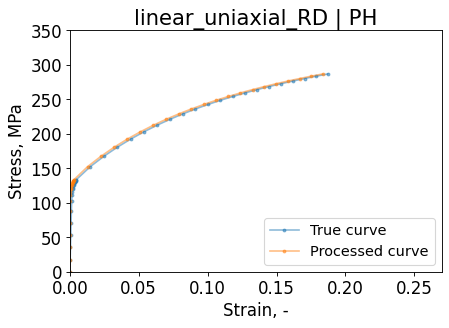

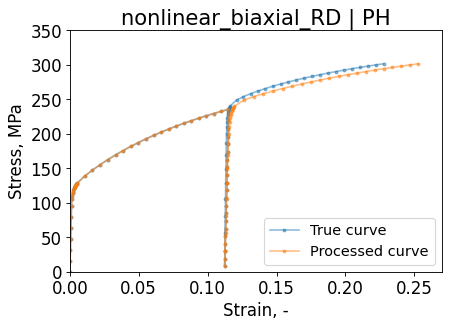

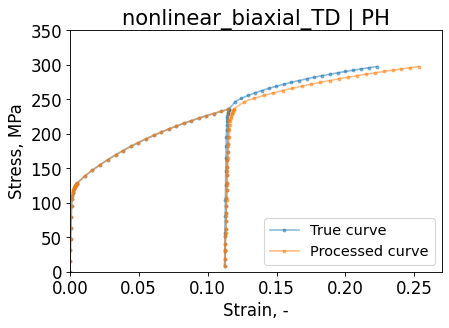

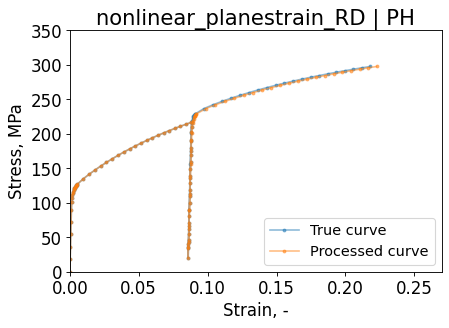

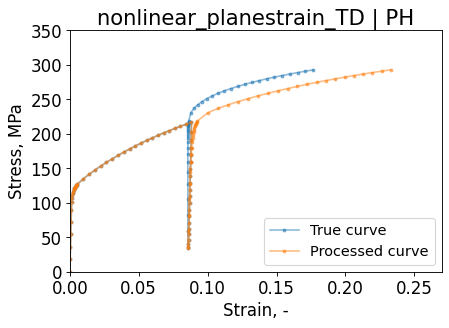

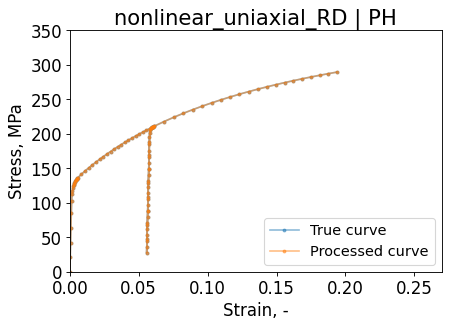

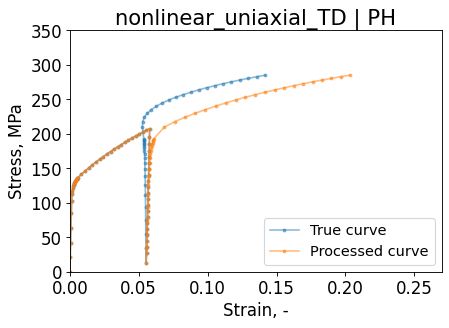

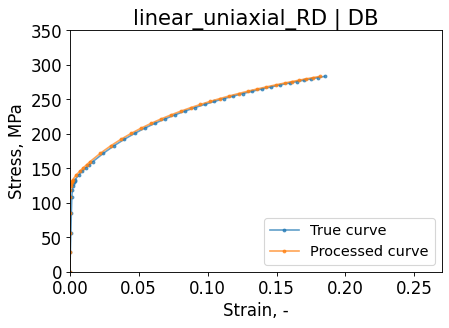

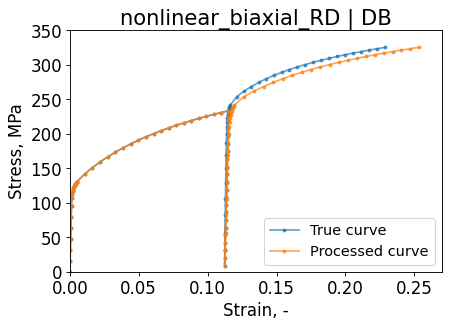

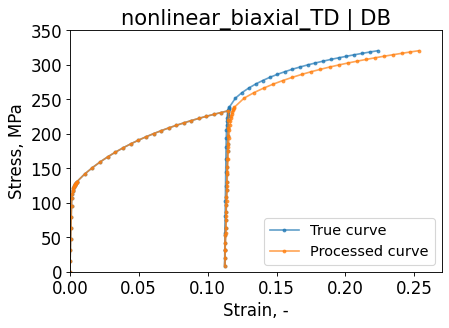

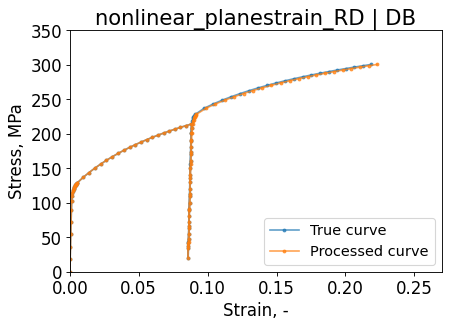

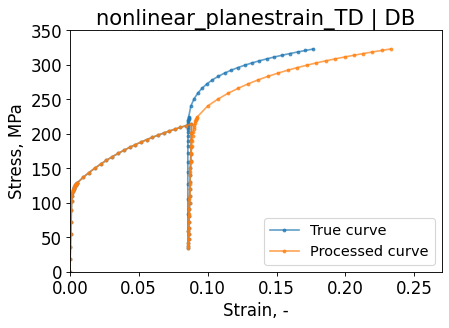

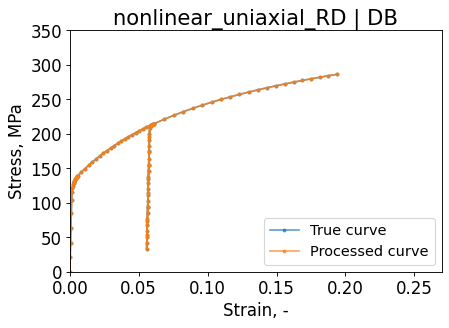

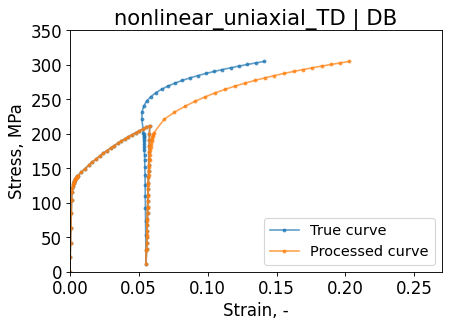

In [16]:
loadings = [
            "linear_uniaxial_RD", 
            "nonlinear_biaxial_RD", 
            "nonlinear_biaxial_TD", 
            "nonlinear_planestrain_RD",     
            "nonlinear_planestrain_TD",     
            "nonlinear_uniaxial_RD", 
            "nonlinear_uniaxial_TD"
            ]
size = 15

yieldingPoint = 0.006


for loading in loadings: 
    path = f"notebooks/plot/PH/{loading}/RVE_1_40_D_tensionX.txt"

    if loading != "linear_uniaxial_RD":
        trueStrain, trueStress = preprocessDAMASKTrue(path).values()
        processStrain, processStress = preprocessDAMASKNonlinear(path).values()
    else:
        trueStrain, trueStress = preprocessDAMASKTrue(path).values()
        processStrain, processStress = preprocessDAMASKLinear(path).values()
    print(np.count_nonzero(processStrain >= yieldingPoint)) 
    #print(np.count_nonzero(trueStrain >= 0.118)) # 0.12 nonlinear_biaxial_RD
    #print(np.count_nonzero(trueStrain >= 0.118)) # 0.12 nonlinear_biaxial_TD
    #print(np.count_nonzero(trueStrain >= 0.091)) # nonlinear_planestrain_RD
    #print(np.count_nonzero(trueStrain >= 0.091)) # nonlinear_planestrain_TD
    #print(np.count_nonzero(trueStrain >= 0.060)) # nonlinear_uniaxial_RD
    #print(np.count_nonzero(trueStrain >= 0.060)) # nonlinear_uniaxial_TD
    #plt.axvline(x = yieldingPoint, color = 'black', label = "Yield strain", alpha=0.4)
    figure(figsize=(6, 4), dpi=80)
    plt.plot(trueStrain, trueStress, alpha = 0.5, label = f"True curve", marker='.', markersize=5)
    plt.plot(processStrain, processStress, alpha = 0.5, label = f"Processed curve", marker='.', markersize=5)

    plt.title(f"{loading} | PH", size=size + 4)
    plt.rc('xtick', labelsize=size)    
    plt.rc('ytick', labelsize=size)  
    plt.xticks(fontsize=size)
    plt.yticks(fontsize=size)
    plt.ylim([0,350])
    plt.xlim([0,0.27])
    plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
    plt.ylabel('Stress, MPa', size=size)
    plt.xlabel("Strain, -", size=size)
    plt.legend(loc=4, fontsize=size - 2)


for loading in loadings: 
    path = f"notebooks/plot/DB/{loading}/RVE_1_40_D_tensionX.txt"

    if loading != "linear_uniaxial_RD":
        trueStrain, trueStress = preprocessDAMASKTrue(path).values()
        processStrain, processStress = preprocessDAMASKNonlinear(path).values()
        trueStress = 1e-6 * trueStress
        processStress = 1e-6 * processStress
    else:
        trueStrain, trueStress = preprocessDAMASKTrue(path).values()
        processStrain, processStress = preprocessDAMASKLinear(path).values()
        trueStress = 1e-6 * trueStress
        processStress = 1e-6 * processStress
    print(np.count_nonzero(processStrain >= yieldingPoint)) 
    #print(np.count_nonzero(trueStrain >= 0.118)) # 0.12 nonlinear_biaxial_RD
    #print(np.count_nonzero(trueStrain >= 0.118)) # 0.12 nonlinear_biaxial_TD
    #print(np.count_nonzero(trueStrain >= 0.091)) # nonlinear_planestrain_RD
    #print(np.count_nonzero(trueStrain >= 0.091)) # nonlinear_planestrain_TD
    #print(np.count_nonzero(trueStrain >= 0.060)) # nonlinear_uniaxial_RD
    #print(np.count_nonzero(trueStrain >= 0.060)) # nonlinear_uniaxial_TD
    #plt.axvline(x = yieldingPoint, color = 'black', label = "Yield strain", alpha=0.4)
    figure(figsize=(6, 4), dpi=80)
    plt.plot(trueStrain, trueStress, alpha = 0.7, label = f"True curve", marker='.', markersize=5)
    plt.plot(processStrain, processStress, alpha = 0.7, label = f"Processed curve", marker='.', markersize=5)

    plt.title(f"{loading} | DB", size=size + 4)
    plt.rc('xtick', labelsize=size)    
    plt.rc('ytick', labelsize=size)  
    plt.xticks(fontsize=size)
    plt.yticks(fontsize=size)
    plt.ylim([0,350])
    plt.xlim([0,0.27])
    plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
    plt.ylabel('Stress, MPa', size=size)
    plt.xlabel("Strain, -", size=size)
    plt.legend(loc=4, fontsize=size - 2)

In [6]:
manualParams = np.load(f'notebooks/initial_processCurves.npy', allow_pickle=True).tolist()
print(len(manualParams))
print(manualParams)


manualParams = np.load(f'notebooks/initial_trueCurves.npy', allow_pickle=True).tolist()
print(len(manualParams))
print(manualParams)

1
{(('a', 4.030016), ('h0', 1919.209605), ('tau0', 184.370685), ('tausat', 664.667834), ('self', 1.453727), ('coplanar', 1.833917), ('collinear', 11.343172), ('orthogonal', 1.497749), ('glissile', 0.867434), ('sessile', 2.774888)): {'strain': array([-1.14103355e-18, -1.13841228e-18, -1.03605219e-06, -3.10942624e-06,
       -6.22139477e-06, -1.03732336e-05, -1.55619774e-05, -2.15983170e-05,
       -2.59191180e-05, -7.90094415e-06,  9.41795748e-05,  5.33808184e-03,
        1.13737274e-02,  1.75093869e-02,  2.36673270e-02,  2.98243598e-02,
        3.59697936e-02,  4.20975330e-02,  4.82036637e-02,  5.42854896e-02,
        6.03410948e-02,  6.63691098e-02,  7.23685434e-02,  7.83386711e-02,
        8.42789654e-02,  9.01890501e-02,  9.60686684e-02,  1.01917655e-01,
        1.07735920e-01,  1.13523442e-01,  1.19280252e-01,  1.25006428e-01,
        1.30702077e-01,  1.36367340e-01,  1.42002387e-01,  1.47607398e-01,
        1.53182564e-01,  1.58728084e-01,  1.64244166e-01,  1.69731034e-01,
       